In [1]:
%display latex

# Opérations, variables, méthodes.

In [2]:
3 + 2 + 5

10

In [3]:
sin(pi/3)

1/2*sqrt(3)

In [4]:
sqrt(1-(sin(pi/3))^2) - cos(pi/3)

0

In [5]:
x = sin(pi/3)
sqrt(1-x^2) - cos(pi/3)

0

In [6]:
M = matrix(QQ, [[1,2],[0,1]])
M

[1 2]
[0 1]

In [7]:
type(3)

<class 'sage.rings.integer.Integer'>

In [8]:
type(3.1)

<class 'sage.rings.real_mpfr.RealLiteral'>

In [9]:
type(RR(3))

<class 'sage.rings.real_mpfr.RealNumber'>

In [10]:
type(QQ(3))

<class 'sage.rings.rational.Rational'>

In [11]:
type(ZZ(3))

<class 'sage.rings.integer.Integer'>

In [12]:
M.determinant()

1

In [13]:
M.eigenvalues()

[1, 1]

In [14]:
M^(-1)

[ 1 -2]
[ 0  1]

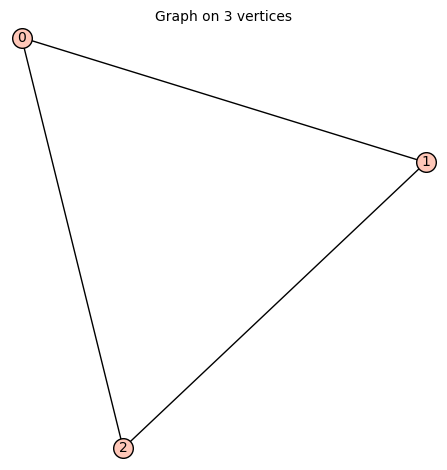

In [16]:
Graph({0:[1,2], 1:[0,2], 2:[0,1]})

In [18]:
k = FiniteField(4)
print(k.multiplication_table())

*  a b c d
 +--------
a| a a a a
b| a b c d
c| a c d b
d| a d b c



In [19]:
f(x) = exp(1-cos(x))
f.taylor(x,0,6)

x |--> 1/720*x^6 + 1/12*x^4 + 1/2*x^2 + 1

# Fonctions, listes, itération.

In [21]:
g(x) = sqrt(1 - exp(-x))
g(0.3)

0.509098987740383

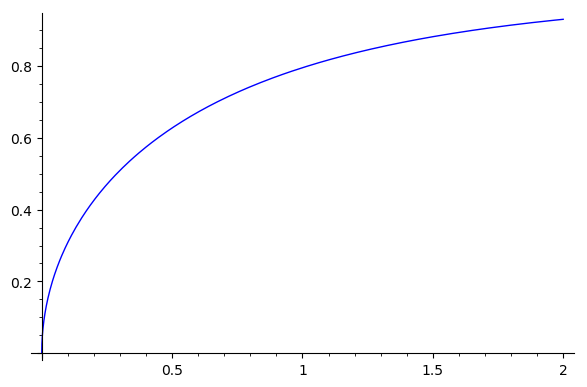

In [22]:
plot(lambda x : g(x),x,0,2)

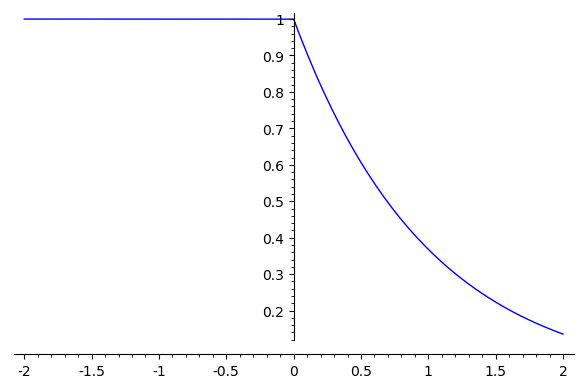

In [24]:
def h(x):
    if x >= 0:
        return exp(-x)
    else:
        return 1
plot(lambda x : h(x),x,-2,2)

In [27]:
def liste_factorielle(n):
    if n==0:
        return []
    elif n==1:
        return [1]
    else:
        L = liste_factorielle(n-1)
        last = L[-1]
        L.append(last*n)
        return L

In [28]:
liste_factorielle(10)

[1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]

In [29]:
def factoriel(n):
    res = 1
    for i in [1..n]:
        res *=i
    return res

In [30]:
factoriel(10)

3628800

# Variables aléatoires.

In [31]:
def random_exp(t):
    return log(random())/(-t)

random_exp(1)

0.2910883970363463

In [32]:
def random_bernoulli(p):
    alea = random()
    if alea<p:
        return 1
    else:
        return 0

In [35]:
[random_bernoulli(0.3) for i in range(10)]

[1, 0, 1, 0, 1, 1, 0, 0, 0, 0]

In [36]:
def random_binomial(n,p):
    return sum([random_bernoulli(p) for i in range(n)])

In [37]:
random_binomial(100,0.4)

45

In [38]:
G = RealDistribution("gaussian",1)

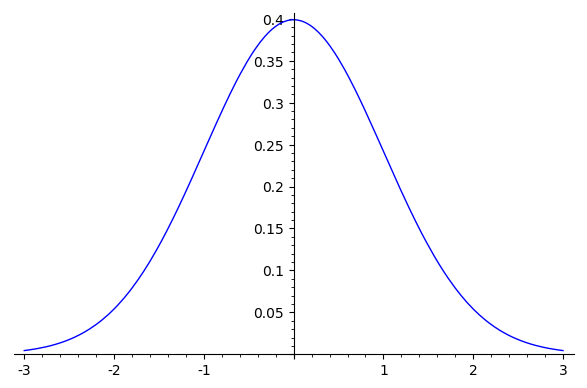

In [41]:
G.plot(-3,3)

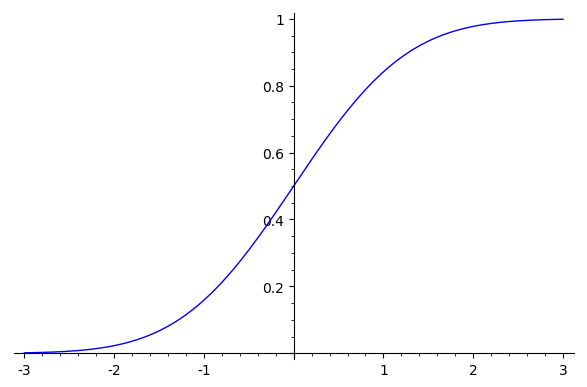

In [42]:
plot(lambda x: G.cum_distribution_function(x),x,-3,3)

In [43]:
[G.get_random_element() for i in range(10)]

[-1.991145654039176,
 -0.07359813638255565,
 -1.426008620739897,
 -0.03828516654414349,
 0.6568745481797429,
 -1.2224308751100423,
 0.9609916092255673,
 0.8619092643067077,
 -0.7221953995477306,
 -0.8531819757837178]

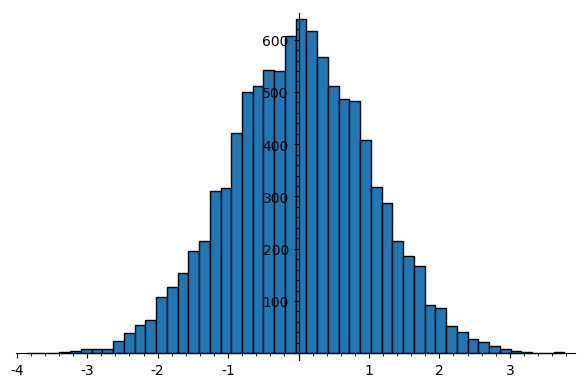

In [44]:
sage.plot.histogram.histogram([G.get_random_element() for i in range(10000)], bins=50)

In [45]:
L = [random_bernoulli(0.5) for i in range(10000)]

In [47]:
RR(sum(L)/10000)

0.500500000000000

In [50]:
def Percolation(n,p):
    G = Graphics()
    for i in range(n-1):
        for j in range(n):
            alea = random()
            if alea<p:
                G += line([(i,j),(i+1,j)])
    for i in range(n):
        for j in range(n-1):
            alea = random()
            if alea<p:
                G += line([(i,j),(i,j+1)])
    G.show(axes=False, aspect_ratio=1)
                

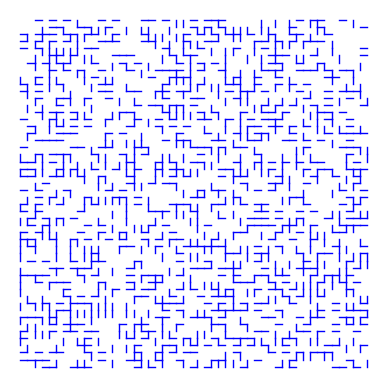

In [55]:
Percolation(50,0.3)

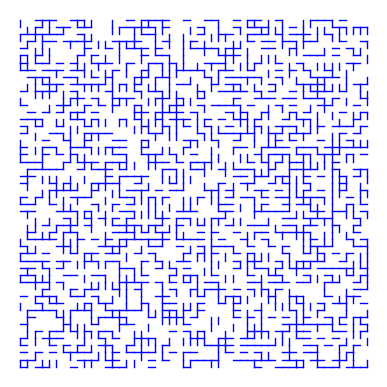

In [54]:
Percolation(50,0.4)

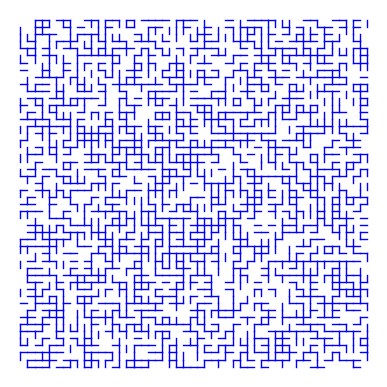

In [53]:
Percolation(50,0.5)

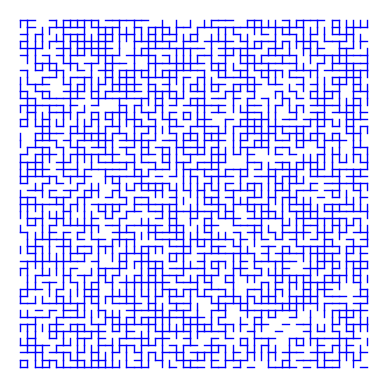

In [56]:
Percolation(50,0.6)

# Chaînes de Markov.

In [57]:
def Marche(n,p):
    position = 0
    G = Graphics()
    for i in range(n):
        alea = random()
        if alea < p:
            new = position + 1
        else:
            new = position -1
        G += line([(i,position),(i+1,new)])
        position = new
    G.show()

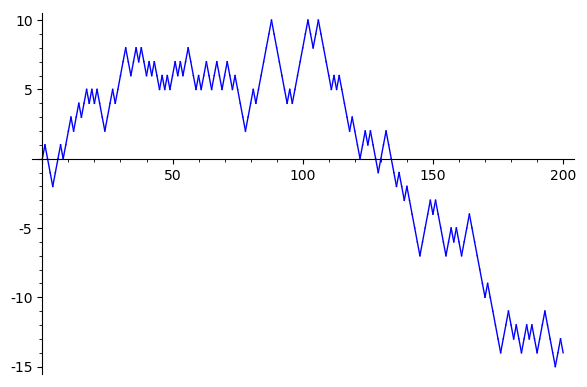

In [60]:
Marche(200,0.5)

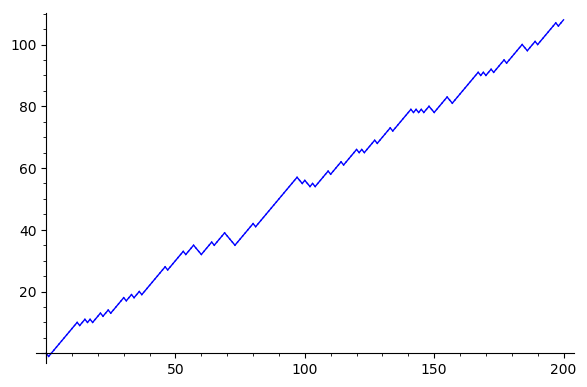

In [61]:
Marche(200,0.8)

In [62]:
def MarcheCercle(N,n):
    res = []
    position = 0
    G = Graphics()
    for i in range(n):
        alea = random()
        if alea < 1/3:
            position = ((position + 1) %N)
        elif alea < 2/3:
            position = (position %N)
        else:
            position = ((position - 1) %N)
        res.append(position)
    return res

In [63]:
MarcheCercle(10,30)

[0,
 9,
 0,
 0,
 1,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 3,
 4,
 3,
 4,
 5,
 6,
 5,
 5]

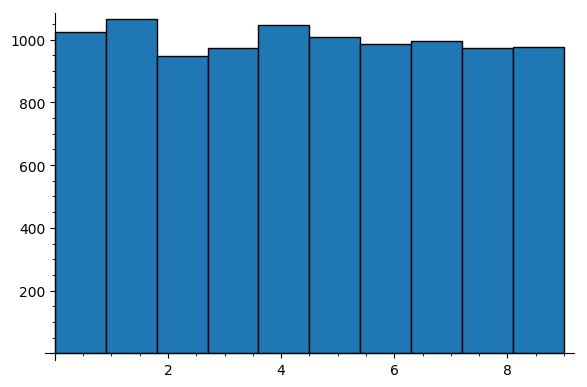

In [65]:
L = [MarcheCercle(10,100)[-1] for i in range(10000)]
sage.plot.histogram.histogram(L, bins=10)

In [66]:
def GaltonWatson(Y,n,k=1):
    res = [k]
    gen = k
    for i in range(n):
        new_gen = sum([Y() for j in range(gen)])
        gen = new_gen
        res.append(gen)
    return res

def Poisson(L):
    alea = random()
    c = exp(-L)
    k = 0
    while c<alea:
        k+=1
        c += exp(-L) * L^k / factorial(k)
    return c

In [ ]:
l = 1